In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [160]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [161]:
df=df.groupby('Time').mean()
print(df.columns)
df.head()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-0.083975,0.096685,1.351413,0.913155,-0.139152,0.190013,0.080398,0.091900,0.054181,-0.038090,...,-0.122041,-0.180417,-0.004593,-0.136459,0.147855,-0.031610,0.062288,-0.003164,76.155,0.0
1.0,-1.162313,-0.762695,1.783101,-0.241756,-0.256754,1.523851,0.514535,0.312556,-1.450839,0.076345,...,0.069849,0.388476,0.359546,-0.932428,0.159867,-0.180513,0.003685,0.000853,251.080,0.0
2.0,-0.792099,0.919130,1.344914,0.117391,0.006897,0.033097,0.534571,-0.005109,0.124534,0.190834,...,-0.108842,0.119227,-0.081928,-0.115080,-0.219402,0.304104,0.236633,0.148117,36.830,0.0
4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990,0.0
7.0,-0.769278,0.852060,0.480594,-0.381863,1.809266,2.074968,0.745388,-1.478390,0.111664,0.419473,...,0.935020,-0.641773,-0.073365,0.180941,-0.021031,-0.217896,-0.597587,-0.471467,67.000,0.0


In [162]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(df)
df.loc[:,:] = scaled_values
df['Class']=df['Class'].astype("int")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.941197,0.651614,0.945298,0.311592,0.768413,0.244702,0.265845,0.718295,0.566092,0.616462,...,0.491451,0.496191,0.592844,0.361374,0.587028,0.324042,0.214782,0.576876,0.002964,0
1.0,0.916067,0.637981,0.953512,0.256346,0.767617,0.258481,0.268490,0.721416,0.502927,0.619336,...,0.495610,0.529743,0.600916,0.253701,0.587951,0.295681,0.213324,0.577026,0.009773,0
2.0,0.924695,0.664661,0.945174,0.273526,0.769401,0.243081,0.268612,0.716923,0.569045,0.622211,...,0.491737,0.513863,0.591130,0.364266,0.558823,0.387985,0.219122,0.582533,0.001434,0
4.0,0.971812,0.652317,0.920445,0.325438,0.770652,0.245556,0.265324,0.718144,0.583332,0.614926,...,0.490461,0.490865,0.589530,0.274313,0.633283,0.281068,0.214091,0.577187,0.000194,0
7.0,0.925226,0.663597,0.928727,0.249643,0.781592,0.264175,0.269897,0.696083,0.568504,0.627952,...,0.514361,0.468981,0.591320,0.404310,0.574058,0.288561,0.198359,0.559364,0.002608,0


In [163]:
y=df['Class']
X=df.drop(columns=['Class'])
#print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [164]:
from imblearn.over_sampling import RandomOverSampler,SMOTE 
os=SMOTE() 
X_train,y_train=os.fit_sample(X_train,y_train) 
y_train.value_counts()

1    99582
0    99582
Name: Class, dtype: int64

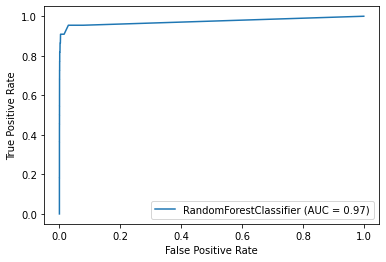

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24898
           1       0.59      0.62      0.60        21

    accuracy                           1.00     24919
   macro avg       0.80      0.81      0.80     24919
weighted avg       1.00      1.00      1.00     24919



0.974022974655581

In [165]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,plot_roc_curve
model=RandomForestClassifier()
model.fit(X_train,y_train)
plot_roc_curve(model, X_test, y_test)  
plt.show()
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

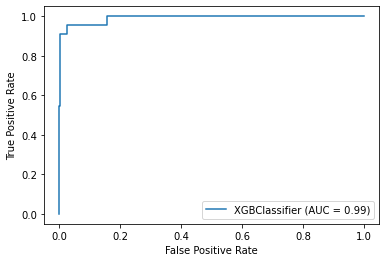

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24886
           1       0.73      0.48      0.58        33

    accuracy                           1.00     24919
   macro avg       0.86      0.74      0.79     24919
weighted avg       1.00      1.00      1.00     24919



0.99129504467497

In [166]:
model=XGBClassifier()
model.fit(X_train,y_train)
plot_roc_curve(model, X_test, y_test)  
plt.show()
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])